# Data Analysis

In [18]:
import os
import numpy as np
import pandas as pd

from fitparse import FitFile
import gpxpy
import gpxpy.gpx

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gmplot

## Load Data

### Arduino Device

In [38]:
data_path = "arduino_device/data"
date = "2023_03_07"
rec = 6

# Acceleration data
acc_data = pd.read_csv(data_path + "/" + date + "/DATA" + str(rec) + ".TXT", sep=";", header=1, names=["ax", "ay", "az"])

### Application

### Helbert

#### Using FIT files (WARNING)

In [4]:
# path = "path_1"
# acc_file = None
# gps_file = None
# for f in os.listdir(path):
#     if f.endswith(".csv"):
#         acc_file = f
#     if f.endswith(".FIT"):
#         gps_file = f

# # Acceleration data
# acc_data = pd.read_csv(path + "/" + acc_file, sep=";", header=1, names=["time", "ax", "ay", "az", "norm"])

# # GPS data

# def semicircles2rad(list):
#     """Convert semicircle data from FIT file to dms data

#     Args:
#         list (list): List of semicircle values

#     Returns:
#         list: list of dms values
#     """
#     const = 180 / 2**31
#     for i in range(len(list)-1):
#         list[i] = list[i] * const
#     return list


# time = []
# alt = []
# lat = []
# long = []
# units = {"alt" : "", "lat": "", "long": ""}

# gps_fit_file = fitfile = FitFile(path + "/" + gps_file)

# for record in fitfile.get_messages("record"):
#     for record_data in record:
#         if record_data.name == "timestamp":
#             time.append(record_data.value)
#         if record_data.name == "altitude":
#             alt.append(record_data.value)
#             if units["alt"] == "":
#                 units["alt"] = record_data.units
#         if record_data.name == "position_lat":
#             lat.append(record_data.value)
#             if units["lat"] == "":
#                 units["lat"] = record_data.units
#         if record_data.name == "position_long":
#             long.append(record_data.value)
#             if units["long"] == "":
#                 units["long"] = record_data.units

# lat = semicircles2rad(lat)
# long = semicircles2rad(long)
# gps_data = pd.DataFrame(list(zip(time, lat, long, alt)), columns= ["time", "lat", "long", "alt"])


#### Using GPX Files

In [9]:
data_path = "helbert/data"
date = "2023_03_02"
path = "path_4"
acc_file = None
gps_file = None
for f in os.listdir(data_path + "/" + date + "/" + path):
    if f.endswith(".csv"):
        acc_file = f
    if f.endswith(".gpx"):
        gps_file = f

# Acceleration data
acc_data = pd.read_csv(data_path + "/" + date + "/" + path + "/" + acc_file, sep=";", header=1, names=["time", "ax", "ay", "az", "norm"])

# GPS data
gpx_file = open(data_path + "/" + date + "/" + path + "/" + gps_file, "r")
gpx = gpxpy.parse(gpx_file)

time = []
lat = []
long = []
alt = []
units = {"alt" : "?", "lat": "deg", "long": "deg"}
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print("{0} Point at ({1},{2}) -> {3}".format(point.time, point.latitude, point.longitude, point.elevation))
            time.append(point.time)
            lat.append(point.latitude)
            long.append(point.longitude)
            alt.append(point.elevation)
gps_data = pd.DataFrame(list(zip(time, lat, long, alt)), columns= ["time", "lat", "long", "alt"])


2023-03-01 18:00:34+00:00 Point at (48.40783246792853,7.445464124903083) -> None
2023-03-01 18:00:47+00:00 Point at (48.40783305466175,7.445462197065353) -> None
2023-03-01 18:00:58+00:00 Point at (48.40784386731684,7.4456338584423065) -> None
2023-03-01 18:01:02+00:00 Point at (48.40788661502302,7.445911467075348) -> None
2023-03-01 18:01:06+00:00 Point at (48.40793380513787,7.446259232237935) -> None
2023-03-01 18:01:09+00:00 Point at (48.407973954454064,7.4465173948556185) -> None
2023-03-01 18:01:13+00:00 Point at (48.40803237631917,7.446794919669628) -> None
2023-03-01 18:01:15+00:00 Point at (48.40807336382568,7.446926683187485) -> None
2023-03-01 18:01:19+00:00 Point at (48.40812130831182,7.447230443358421) -> None
2023-03-01 18:01:21+00:00 Point at (48.40816489420831,7.447380563244224) -> None
2023-03-01 18:01:25+00:00 Point at (48.408243767917156,7.447715923190117) -> None
2023-03-01 18:01:27+00:00 Point at (48.4082742780447,7.447883812710643) -> None
2023-03-01 18:01:29+00:00

## Acceleration Data

In [10]:
acc_data

,time,ax,ay,az,norm
0,19:00:25:0180,"-0,4190","0,4221","0,8355","1,035"
1,19:00:25:0220,"-0,4005","0,4303","0,8360","1,031"
2,19:00:25:0240,"-0,3818","0,4393","0,8351","1,027"
3,19:00:25:0270,"-0,3651","0,4517","0,8379","1,028"
4,19:00:25:0290,"-0,3507","0,4567","0,8429","1,029"
...,...,...,...,...,...
60982,19:05:31:3410,"-0,3021","0,4447","0,7976","0,970"
60983,19:05:31:3430,"-0,3068","0,4459","0,8008","0,974"
60984,19:05:31:3450,"-0,3138","0,4498","0,7977","0,976"
60985,19:05:31:3470,"-0,3210","0,4525","0,7995","0,981"


In [11]:
acc_data.describe()

,time,ax,ay,az,norm
count,60987,60987,60987,60987,60987
unique,60987,6850,7134,5532,795
top,19:00:25:0180,"0,6959","-0,0146","0,7741","1,025"
freq,1,96,101,78,1174


In [ ]:
# acc_data.hist(column="ax")

In [39]:
acc_data.isna().sum()

ax    0
ay    0
az    0
dtype: int64

Text(0.5, 1.0, 'Acceleration Z')

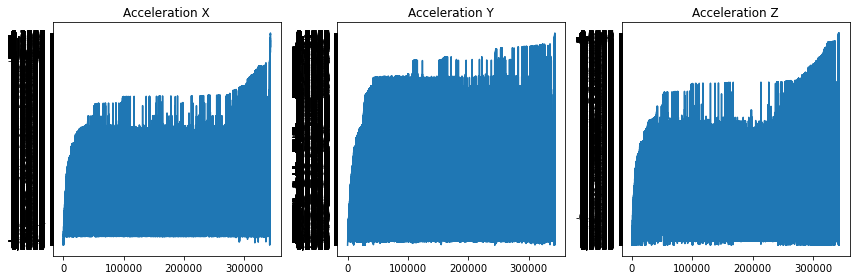

In [ ]:
nb_measure = acc_data.shape[0]

fig, axs = plt.subplots(1,3)
fig.set_tight_layout(True)
fig.set_size_inches(12, 4)
axs[0].plot(range(nb_measure), acc_data["ax"])
axs[0].set_title("Acceleration X")
axs[1].plot(range(nb_measure), acc_data["ay"])
axs[1].set_title("Acceleration Y")
axs[2].plot(range(nb_measure), acc_data["az"])
axs[2].set_title("Acceleration Z")

In [21]:
def single_graph(df):
    fig = go.Figure()
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col))
    return fig

def triple_graph(df):
    col_num = 1
    fig = make_subplots(rows=1, cols=3)
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col), row=1, col=col_num)
      col_num += 1
    fig.update_layout(height=600, width=800, title_text="Test")
    return fig

In [42]:
# fig = single_graph(acc_data[["ax", "ay", "az", "norm"]])
fig = single_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_1.html", full_html=False, include_plotlyjs="cdn")
fig.show()

In [40]:
fig = triple_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_2.html", full_html=False, include_plotlyjs="cdn")
fig.show()

## GPS Data

In [13]:
gps_data

,time,lat,long,alt
0,2023-03-01 18:00:34+00:00,48.407832,7.445464,None
1,2023-03-01 18:00:47+00:00,48.407833,7.445462,None
2,2023-03-01 18:00:58+00:00,48.407844,7.445634,None
3,2023-03-01 18:01:02+00:00,48.407887,7.445911,None
4,2023-03-01 18:01:06+00:00,48.407934,7.446259,None
...,...,...,...,...
122,2023-03-01 18:05:10+00:00,48.398008,7.438846,None
123,2023-03-01 18:05:12+00:00,48.397925,7.438688,None
124,2023-03-01 18:05:15+00:00,48.397842,7.438557,None
125,2023-03-01 18:05:18+00:00,48.397830,7.438549,None


In [14]:
units # Check if data has been converted when loading

{'alt': '?', 'lat': 'deg', 'long': 'deg'}

In [15]:
gps_data.describe()

,lat,long
count,127.000000,127.000000
mean,48.403793,7.446247
std,0.003757,0.003521
min,48.397830,7.438549
25%,48.400252,7.444659
50%,48.404109,7.447500
75%,48.407728,7.448993
max,48.408625,7.450468


array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>, <AxesSubplot:>]],
      dtype=object)

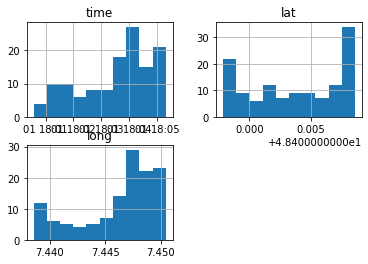

In [16]:
gps_data.hist()

In [17]:
gps_data.isna().sum()

time      0
lat       0
long      0
alt     127
dtype: int64

In [32]:
min_lat, max_lat = min(gps_data["lat"]), max(gps_data["lat"])
min_lon, max_lon = min(gps_data["long"]), max(gps_data["long"])
mymap = gmplot.GoogleMapPlotter(min_lat + (max_lat - min_lat) / 2,
                                min_lon + (max_lon - min_lon) / 2,
                                12)
mymap.plot(gps_data["lat"], gps_data["long"], "red", edge_width=2)
mymap.draw("data_analysis_gps.html")

In [36]:
import webbrowser
webbrowser.open("data_analysis_gps.html")

True

## Tests

In [34]:
from IPython.display import display, HTML
display(src="data_analysis_gps.html")

In [35]:
from IPython.display import IFrame
IFrame(src="data_analysis_gps.html", width=700, height=600)